# CONTEXTO
Este dominio de cáncer de mama se obtuvo del Centro Médico Universitario, Instituto de Oncología, Ljubljana, Yugoslavia (1988). Este es uno de los tres dominios proporcionados por el Instituto de Oncología que han aparecido repetidamente en la literatura sobre aprendizaje automático. En base a este dataset se tiene proposito principal clasificar si el cancer de mama puede presentar eventos recurrentes o no recurrentes en el paciente, lo que hace referencia a que el cancer pueda tener una probabilidad significativa de volver a aparecer despues de un tratamiento previo o si este no tiene un indice significativo para que pueda reaparecer respectivamente.



 1. ¿Qué factores están más asociados con la recurrencia del cáncer de mama?
 2. ¿Que metodo de aprendizaje automatico es el mejor para predecir la recurrencia de cancer de mama?
 3. ¿Es posible predecir si un paciente experimentará una recurrencia del cáncer de mama basado en sus características?

# DICCIONARIO DE VARIABLES

**Age**: Rango de valores de edad en grupos de 10 años, esta variable es de tipo categorica ordinal.

**Menopause**: Caracteristica de tipo categorica nominal, esta variable posee tres categorias que son Con_menopausea,  que hace referencia a que la persona se encuentra atravesando el promedio intermedio de la menopausea; Posterior_menopausia, que hace referencia a que la paciente se encuentra en una etapa posterior de la menopausea y premeno, que se refiere a la etapa previa a la menopausea.

**tumor-size**: Rango de valores del posible tamaño del tumor en grupos de 5 milimetros. Esta variable es de tipo categorica ordinal.

**inv-nodes**: Esta variable hace referencia a la cantidad de ganglios linfáticos invadidos por el tumor. Esta variable es de tipo categorica ordinal ya que sesta representada en rangos de amplitud dos.

**node-caps**: Esta variable proporciona informacion sobre la participacion de la capsula de ganglios linfaticos que indica presencia o ausencia del compromiso de la capsula, es decir si el cancer no ha penetrado la capsula del ganglio linfatico. Esta variable es de tipo categorica nominal.

**deg-malig**: Esta variable hace referencia al grado de malignidad que presenta el tumor debido, este valor puede variar dependiendo de la efectividad del tratamiento y el estado de la paciente. Dicha variable es de tipo numerica (toma valores de 1 hasta 3 siendo 1 el valor menos maligno y el 3 el estado mas maligno).

**breast**: Esta variable indica la localizacion en que se encuentra el tumor en el tejido mamario (derecha o izquierda). Esta variable es de tipo categorida nominal.

**breast-quad** Esta variable es conjunta con *breast* ya que en esta representa la posicion en que se encuentra el tumor de acuerdo con la localizacion del mismo en el tejido mamario. La variable es de tipo categorica nominal.

**irradiat**: Esta variable indica si la paciente recibio o no radioterapia como forma de tratamiento, es de tipo categorica nominal.

**Class**: Esta es la variable objetivo, en el cual indica si la paciente presenta eventos recurrentes o no recurrentes, lo que hace referencia a que el cancer pueda tener una probabilidad significativa de volver a aparecer despues de un tratamiento previo o si este no tiene un indice significativo para que pueda reaparecer respectivamente.

In [ ]:
!pip install ucimlrepo #Instalacion de la libreria ucimlrepo para llamar el dataset

In [ ]:
#Importacion de las librerias requeridas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import iplot

In [ ]:
from ucimlrepo import fetch_ucirepo

# Llamado del dataset
breast_cancer = fetch_ucirepo(id=14)

# Definicion de las etiquetas y el target en datos
X = breast_cancer.data.features
y = breast_cancer.data.targets

# metadata
print(breast_cancer.metadata)

# variable information
print(breast_cancer.variables)


{'uci_id': 14, 'name': 'Breast Cancer', 'repository_url': 'https://archive.ics.uci.edu/dataset/14/breast+cancer', 'data_url': 'https://archive.ics.uci.edu/static/public/14/data.csv', 'abstract': 'This breast cancer domain was obtained from the University Medical Centre, Institute of Oncology, Ljubljana, Yugoslavia. This is one of three domains provided by the Oncology Institute that has repeatedly appeared in the machine learning literature. (See also lymphography and primary-tumor.)', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 286, 'num_features': 9, 'feature_types': ['Categorical'], 'demographics': ['Age'], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Mar 07 2024', 'dataset_doi': '10.24432/C51P4M', 'creators': ['Matjaz Zwitter', 'Milan Soklic'], 'intro_paper': None, 'additional_info': {'summary': 'Thi

In [ ]:
# Conversion de los datos a dataframes
datos = pd.DataFrame(X)
target = pd.DataFrame(y)

In [ ]:
df = pd.concat([datos , target],axis=1)
df

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,30-39,premeno,30-34,0-2,no,3,left,left_low,no,no-recurrence-events
1,40-49,premeno,20-24,0-2,no,2,right,right_up,no,no-recurrence-events
2,40-49,premeno,20-24,0-2,no,2,left,left_low,no,no-recurrence-events
3,60-69,ge40,15-19,0-2,no,2,right,left_up,no,no-recurrence-events
4,40-49,premeno,0-4,0-2,no,2,right,right_low,no,no-recurrence-events
...,...,...,...,...,...,...,...,...,...,...
281,30-39,premeno,30-34,0-2,no,2,left,left_up,no,recurrence-events
282,30-39,premeno,20-24,0-2,no,3,left,left_up,yes,recurrence-events
283,60-69,ge40,20-24,0-2,no,1,right,left_up,no,recurrence-events
284,40-49,ge40,30-34,5-Mar,no,3,left,left_low,no,recurrence-events


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          286 non-null    object
 1   menopause    286 non-null    object
 2   tumor-size   286 non-null    object
 3   inv-nodes    286 non-null    object
 4   node-caps    278 non-null    object
 5   deg-malig    286 non-null    int64 
 6   breast       286 non-null    object
 7   breast-quad  285 non-null    object
 8   irradiat     286 non-null    object
 9   Class        286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [ ]:
print(df.shape)
print(df.isnull().sum())

(286, 10)
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    1
irradiat       0
Class          0
dtype: int64


In [ ]:
columnas = df.select_dtypes(include=['object']).columns
# Revision de los registros unicos y sus valores
for columna in columnas:
    print(f'Clases únicas en {columna}:')
    print(df[columna].unique())
    print()

Clases únicas en age:
['30-39' '40-49' '60-69' '50-59' '70-79' '20-29']

Clases únicas en menopause:
['premeno' 'ge40' 'lt40']

Clases únicas en tumor-size:
['30-34' '20-24' '15-19' '0-4' '25-29' '50-54' '14-Oct' '40-44' '35-39'
 '9-May' '45-49']

Clases únicas en inv-nodes:
['0-2' '8-Jun' '11-Sep' '5-Mar' '15-17' '14-Dec' '24-26']

Clases únicas en node-caps:
['no' 'yes' nan]

Clases únicas en breast:
['left' 'right']

Clases únicas en breast-quad:
['left_low' 'right_up' 'left_up' 'right_low' 'central' nan]

Clases únicas en irradiat:
['no' 'yes']

Clases únicas en Class:
['no-recurrence-events' 'recurrence-events']



In [ ]:
# Conteo de registros de las variables Tumor-size e inv-nodes para determinar si hay registros mal digitados
print(df["tumor-size"].value_counts())
print()
print(df["inv-nodes"].value_counts())

tumor-size
30-34     60
25-29     54
20-24     50
15-19     30
14-Oct    28
40-44     22
35-39     19
0-4        8
50-54      8
9-May      4
45-49      3
Name: count, dtype: int64

inv-nodes
0-2       213
5-Mar      36
8-Jun      17
11-Sep     10
15-17       6
14-Dec      3
24-26       1
Name: count, dtype: int64


Realizamos una copia para trabajar en el data set luego de revisar la informacion de este

In [ ]:
df1=df.copy()

Correccion y limpieza de variables

In [ ]:
columnas_corregidas = df1.select_dtypes(include=['object']).columns
# Correccion de variables mal digitadas
for variantes in columnas_corregidas:
 df1[variantes] = df1[variantes].str.replace("14-Oct", "10-14", case=False)
 df1[variantes] = df1[variantes].str.replace("9-May", "5-9", case=False)
 df1[variantes] = df1[variantes].str.replace("5-Mar", "3-5", case=False)
 df1[variantes] = df1[variantes].str.replace("8-Jun", "6-8", case=False)
 df1[variantes] = df1[variantes].str.replace("11-Sep", "9-11", case=False)
 df1[variantes] = df1[variantes].str.replace("14-Dec", "12-14", case=False)

df1["menopause"] = df1["menopause"].str.replace("lt40", "Con_Menopausia", case=False)
df1["menopause"] = df1["menopause"].str.replace("ge40", "posterior_menopausia", case=False)
df1["menopause"] = df1["menopause"].str.replace("premeno", "Previo_menopausia", case=False)


In [ ]:
# Verificacion de los registros corregidos en tumor-size e inv-nodes
print("Los valores corregidos de la variable tumor size son: ")
print(df1["tumor-size"].value_counts())
print()
print("Los valores corregidos de la variable inv nodes son: ")
print(df1["inv-nodes"].value_counts())
print()
print("Los valores corregidos de la variable menopause son: ")
print(df1["menopause"].value_counts())
print()

Los valores corregidos de la variable tumor size son: 
tumor-size
30-34    60
25-29    54
20-24    50
15-19    30
10-14    28
40-44    22
35-39    19
0-4       8
50-54     8
5-9       4
45-49     3
Name: count, dtype: int64

Los valores corregidos de la variable inv nodes son: 
inv-nodes
0-2      213
3-5       36
6-8       17
9-11      10
15-17      6
12-14      3
24-26      1
Name: count, dtype: int64

Los valores corregidos de la variable menopause son: 
menopause
Previo_menopausia       150
posterior_menopausia    129
Con_Menopausia            7
Name: count, dtype: int64



## Imputacion de datos faltantes

Las variables en las que se realizara imputacion de datos faltantes son noded-caps y breast-quad. Para ello se les realizara la imputacion por medio de la moda al tratarse de variables categoricas




In [ ]:
# Imputacion de datos nulos de variables node-caps y breast-quad mediante la moda al ser categoricos
moda1= df1["node-caps"].mode()[0]
df1["node-caps"]=df1["node-caps"].fillna(moda1)

moda2= df1["breast-quad"].mode()[0]
df1["breast-quad"]=df1["breast-quad"].fillna(moda2)

In [ ]:
# Verificacion y conteo de valores nulos del dataframe
print(df1.shape)
print(df1.isnull().sum())

(286, 10)
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
Class          0
dtype: int64


## Analisis exploratorio de datos

En este apartado se realizara un EDA univariable y multivariable en donde se explorara el comportamiento de cada variable mediante estadisticas descriptivas, tablas de frecuencia y visualizacion de los datos mediante distintos tipos de graficos


Analisis univariable

In [ ]:
# Importacion de la libreria plotly para graficar las variables
import plotly.graph_objects as go

In [ ]:
# Generacion de una tabla de frecuencias de la variable Edad
conteo_edad = df1['age'].value_counts()

# Calculo de los porcentajes de los rangos de edades en el dataframe
porcentajes = (conteo_edad/conteo_edad.sum())*100
porcentajes = porcentajes.round(2)
frecuencia_edad = pd.DataFrame({"Rango_edad": conteo_edad.index, "Frecuencia": conteo_edad.values, "Porcentaje": porcentajes})

frecuencia_edad

#Grafico de barras

texto_porcentajes = [f'{porcentajes:.2f}%' for porcentajes in frecuencia_edad['Porcentaje']]
figu = go.Figure(data=[go.Bar(
    x = frecuencia_edad["Rango_edad"], y = frecuencia_edad["Frecuencia"],
    text=texto_porcentajes,
    textposition="auto")])

figu.update_layout(
    title='Gráfico de Barras de Frecuencia por rango de edad',
    xaxis=dict(title='Rango de edad'),
    yaxis=dict(title='Frecuencia'),
    template='plotly_dark',
    colorway=['#67001f']
)


# Mostrar el gráfico
figu.show()


En este grafico se puede observar que en mas del 60% de los pacientes en el dataset son personas en un rango de edad entre los 40-59 años

In [ ]:
#Analisis por variable menupause
conteo_menopause = df1["menopause"].value_counts()

# Al igual que la grafica de edad, se calcula el porcentaje de menopause
porcentajemeno = (conteo_menopause/conteo_menopause.sum())*100
porcentajemeno = porcentajemeno.round(2)

Frecuencia_meno = pd.DataFrame({"Conteo": conteo_menopause.values, "Porcentaje":porcentajemeno})
Frecuencia_meno

,Conteo,Porcentaje
menopause,,
Previo_menopausia,150,52.45
posterior_menopausia,129,45.10
Con_Menopausia,7,2.45


In [ ]:
import plotly.express as px


In [ ]:
import plotly.express as px

# Graficamos un Diagrama de pastel para mostrar los porcentajes de cada tipo de menopausia
texto_meno = [f'{porcentajemeno:.2f}%' for porcentajemeno in Frecuencia_meno['Porcentaje']]
fig = px.pie(Frecuencia_meno, values='Conteo', names= Frecuencia_meno.index,
             title="Diagrama de pastel de pacientes con distintos tipos de menopausia",color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(
    plot_bgcolor='black',  # Color de fondo del gráfico
    paper_bgcolor='black',  # Color de fondo del papel (fuera del gráfico)
    title_font=dict(color='white'),  # Color del texto del título
    font=dict(color='white'),  # Color del texto del eje x e y
    title_x=0.5  # Centrar el título
)
fig.show()

En el grafico previo se puede observar que un 52,4% de todas las pacientes presentan pre-menopausia y un 45.1% de las pacientes se encuentran en un periodo post-menopausia. En el siguiente grafico se analizara la edad de cada paciente con respecto al tipo de menopausia.

# Analisis entre las variables edad y tipo de menopausia

In [ ]:
#En este apartado se realizo una tabla de frecuencias que recopilara la cantidad de los periodos de menopausia con respecto a la edad de cada pacienta
#Para ello se utilizo el comando de Pandas crosstab en donde se define los indices y las columnas que debe contener la tabla de frecuencias
Tabla_frecuencias_Edad_meno = pd.crosstab(index=df1['age'], columns=df1['menopause'])

fig1 = px.bar(Tabla_frecuencias_Edad_meno, x=Tabla_frecuencias_Edad_meno.index, y=Tabla_frecuencias_Edad_meno.columns,
             title="Grafico de barras de pacientes con distintos tipos de menopausia de acuerdo a el rango de edad",color_discrete_sequence=px.colors.sequential.RdBu)
fig1.update_layout(
    plot_bgcolor='black',  # Color de fondo del gráfico
    paper_bgcolor='black',  # Color de fondo del papel (fuera del gráfico)
    title_font=dict(color='white'),  # Color del texto del título
    font=dict(color='white'),  # Color del texto del eje x e y
    title_x=0.5
)



In [ ]:
#En este apartado se realizo una tabla de frecuencias que recopilara la cantidad de los periodos de menopausia con respecto a la edad de cada pacienta
#Para ello se utilizo el comando de Pandas crosstab en donde se define los indices y las columnas que debe contener la tabla de frecuencias
Tabla_frecuencias_meno_class = pd.crosstab(index=df1['menopause'], columns=df1['Class'])

fig1 = px.bar(Tabla_frecuencias_meno_class, x=Tabla_frecuencias_meno_class.index, y=Tabla_frecuencias_meno_class.columns,
             title="Grafico de barras de la clase según los distintos tipos de menopausia",color_discrete_sequence=px.colors.sequential.RdBu)
fig1.update_layout(
    plot_bgcolor='black',  # Color de fondo del gráfico
    paper_bgcolor='black',  # Color de fondo del papel (fuera del gráfico)
    title_font=dict(color='white'),  # Color del texto del título
    font=dict(color='white'),  # Color del texto del eje x e y
    title_x=0.5
)


In [ ]:
# Generacion de grafico de barras a partir de la tabla de frecuencias de edad y tipo de menopausia
fig2=px.bar(Tabla_frecuencias_Edad_meno, x=Tabla_frecuencias_Edad_meno.columns, y=Tabla_frecuencias_Edad_meno.index,
             title="Grafico de barras de pacientes con distintos tipos de menopausia de acuerdo a el rango de edad",color_discrete_sequence=px.colors.sequential.RdBu)
fig2.update_layout(
    plot_bgcolor='black',  # Color de fondo del gráfico
    paper_bgcolor='black',  # Color de fondo del papel (fuera del gráfico)
    title_font=dict(color='white'),  # Color del texto del título
    font=dict(color='white'),  # Color del texto del eje x e y
    title_x=0.5
)
fig2.show()

Como se observa en el grafico de barras anterior, se puede apreciar que las pacientas mayores de 50 años en gran medida se encuentran en la etapa de post-menopausia, mientras que aquellas pacientes menores de 50 años en una gran proporcion se encuentran en la etapa de pre-menopausia. Mientras que el rango de edades en que se encuentra en el periodo intermedio de la menopausia es entre los 39 y 59. Por lo que se puede observar que existe una correlacion entre la edad de las pacientes y su etapa de menopausia.

## Analisis exploratorio entre las caracteristicas del tumor

En este apartado se analizara las posibles correlaciones que hay entre las caracteristicas del tumor; para ello, se analizaran las variables correspondientes a:

- Tumor-size
- Node-caps
- inv-nodes    
- deg-malig

# Analisis entre las variables tumor-size y node-caps

In [ ]:
#Analisis entre Tumor-size y node-caps

#Para realizar un analisis entre la variable tumor-size y node-caps es necesario realizar una tabla de frecuencias
#que me recopile la cantidad de veces que se extendio el cancer sobre la capsula de ganglios linfaticos con respecto al tamaño del tumor
Frecuencia_TamañoyNodos = pd.crosstab(index=df1['tumor-size'], columns=df1['node-caps'])
Frecuencia_TamañoyNodos
# Se analiza el porcentaje en base a la candiad si
Frecuencia_TamañoyNodos['Total'] = Frecuencia_TamañoyNodos.sum(axis=1)
Frecuencia_TamañoyNodos["Porcentaje_Yes"] =  Frecuencia_TamañoyNodos["yes"] / (Frecuencia_TamañoyNodos["yes"] + Frecuencia_TamañoyNodos["no"])
Frecuencia_TamañoyNodos["Porcentaje_Yes"] = Frecuencia_TamañoyNodos["Porcentaje_Yes"].apply(lambda x: '{:.2f}%'.format(x * 100))


Frecuencia_TamañoyNodos

node-caps,no,yes,Total,Porcentaje_Yes
tumor-size,,,,
0-4,8,0,8,0.00%
10-14,27,1,28,3.57%
15-19,26,4,30,13.33%
20-24,41,9,50,18.00%
25-29,44,10,54,18.52%
30-34,44,16,60,26.67%
35-39,12,7,19,36.84%
40-44,16,6,22,27.27%
45-49,2,1,3,33.33%


In [ ]:
# Se concatenan las variables si y no ademas de su respectivo porcentaje
#de la columna Node-caps para graficar el tamaño del tumor en base a esta
Frec_nodeCaps = pd.concat([Frecuencia_TamañoyNodos.no, Frecuencia_TamañoyNodos.yes, Frecuencia_TamañoyNodos.Porcentaje_Yes], axis=1)
fig3 = px.bar(Frec_nodeCaps, x=Frec_nodeCaps.index, y=Frec_nodeCaps.columns,
             title="Tamaño del tumor vs cantidad de capsulas de ganglios linfativos comprometidos en el seno", color_discrete_sequence=px.colors.sequential.RdBu, text=Frec_nodeCaps.Porcentaje_Yes)

#Nombro los ejes del grafico
fig3.update_xaxes(title_text='Rango de tamaños del tumor (mm)',color="White")
fig3.update_yaxes(title_text='Capsulas de ganglios linfaticos comprometidos en los pacientes',color="White")
fig3.update_layout(
    plot_bgcolor='black',  # Color de fondo del gráfico
    paper_bgcolor='black',  # Color de fondo del papel (fuera del gráfico)
    title_font=dict(color='white'),  # Color del texto del título
    font=dict(color='white'),  # Color del texto del eje x e y
    title_x=0.5
)
fig3.show()

Dentro del grafico anterior se puede apreciar que para los tumores con una medida mayor a 30mm su porcentaje de capsulas de ganglios linfaticos comprometidos son mayores al 25%; es decir, que para aquellos tumores con una dimension mayor de 30mm el cancer ha logrado penetrar la capsula del ganglio linfatico a nivel muestral.

# Analisis entre las variables tumor-size y inv-nodes.

In [ ]:
# Generacion de tabla de frecuencia entre las variables tumor-size e inv-nodes
Frecuencia_TamañoyNodosInv = pd.crosstab(index=df1['tumor-size'], columns=df1['inv-nodes'])
Frecuencia_TamañoyNodosInv

inv-nodes,0-2,12-14,15-17,24-26,3-5,6-8,9-11
tumor-size,,,,,,,
0-4,8,0,0,0,0,0,0
10-14,26,0,0,0,1,1,0
15-19,26,1,1,0,0,1,1
20-24,36,0,0,1,12,1,0
25-29,40,1,1,0,8,3,1
30-34,37,1,1,0,10,7,4
35-39,13,0,2,0,0,1,3
40-44,14,0,1,0,5,2,0
45-49,2,0,0,0,0,1,0


In [ ]:
# Generacion del grafico de barras a partir de la tabla de frecuencia del tumor-size y los inv-nodes
fig4 = px.bar(Frecuencia_TamañoyNodosInv, x=Frecuencia_TamañoyNodosInv.index, y=Frecuencia_TamañoyNodosInv.columns,
             title="Tamaño del tumor respecto a la cantidad de nodos invadidos", color_discrete_sequence = px.colors.sequential.RdBu)

#Nombro los ejes del grafico
fig4.update_xaxes(title_text='Rango de tamaños del tumor (mm)',color="White")
fig4.update_yaxes(title_text='Cantidad de nodos invadidos',color="White")
fig4.update_layout(
    plot_bgcolor='black',  # Color de fondo del gráfico
    paper_bgcolor='black',  # Color de fondo del papel (fuera del gráfico)
    title_font=dict(color='white'),  # Color del texto del título
    font=dict(color='white'),  # Color del texto del eje x e y
    title_x=0.5
)
fig4.show()

A partir de la anterior grafica, se puede observar que no hay una relacion proporcional entre el tamaño del tumor y la cantidad de nodos invadidos. Ademas, se observa una mayor cantidad de nodos invadidos que se encuentran entre los rangos del tumor de 30-34 mm. Por otra parte, la mayor proporcion de nodos invadidos que estan entre 0-2 se encuentran en los rangos del tamaño del tumor entre 25-29 mm. Y se puede observar que para el rango entre 45-49 tiene la menor cantidadde nodos invadidos con un total de 3 sujetos.

# Analisis entre tumor-size y deg-malig

In [ ]:
#Generacion de tabla de frecuencias entre el tamaño del tumor y su grado de malignidad
Frecuencia_TamañoyMalig = pd.crosstab(index=df1['tumor-size'], columns=df1['deg-malig'])
Frecuencia_TamañoyMalig

deg-malig,1,2,3
tumor-size,,,
0-4,3,4,1
10-14,14,12,2
15-19,9,15,6
20-24,10,27,13
25-29,11,26,17
30-34,13,21,26
35-39,2,7,10
40-44,5,9,8
45-49,1,1,1


In [ ]:
# Generacion de un grafico a partir de la tabla de frecuencias de tumor-size y deg-malig
fig5 = px.bar(Frecuencia_TamañoyMalig, x=Frecuencia_TamañoyMalig.index, y=Frecuencia_TamañoyMalig.columns,
             title="Tamaño del tumor respecto al grado de malignidad", color_discrete_sequence = px.colors.sequential.RdBu)

#Nombro los ejes del grafico
fig5.update_xaxes(title_text='Rango de tamaños del tumor (mm)',color="White")
fig5.update_yaxes(title_text='Frecuencia de acuerdo al grado de malignidad del cancer',color="White")
fig5.update_layout(
    plot_bgcolor='black',  # Color de fondo del gráfico
    paper_bgcolor='black',  # Color de fondo del papel (fuera del gráfico)
    title_font=dict(color='white'),  # Color del texto del título
    font=dict(color='white'),  # Color del texto del eje x e y
    title_x=0.5
)
fig5.show()

Tal y como se puede apreciar en el grafico previo, existe un mayor grado de malignidad del tumor cuando el rango de tamaño del mismo se encuentra entre 20 a 39 mm. Ademas, para los rangos entre 20-29 la mayor proporcion de grado de malignidad de los tumores es de 2.

# Analisis entre las variables deg-malig y node-caps

In [ ]:
#Generacion de tabla de frecuencias entre el tamaño del tumor y su grado de malignidad
#En este grafico se prevee analizar una posible causalidad entre el grado de malignidad y si se ha penetrado o no la capsula de ganglios linfaticos
Frecuencia_MaligyNodos = pd.crosstab(index=df1['deg-malig'], columns=df1['node-caps'])
Frecuencia_MaligyNodos

node-caps,no,yes
deg-malig,,
1,71,0
2,104,26
3,55,30


In [ ]:
# Generacion de un grafico a partir de la tabla de frecuencias de deg-malig y node-caps
fig6 = px.bar(Frecuencia_MaligyNodos, x=Frecuencia_MaligyNodos.index, y=Frecuencia_MaligyNodos.columns,
             title="Grado de malignidad respecto a al compromiso de la capsula de ganglios linfaticos", color_discrete_sequence = px.colors.sequential.RdBu)

#Nombro los ejes del grafico y defino color de los ejes en blanco
fig6.update_xaxes(title_text='Grado de malignidad',color="White")
fig6.update_yaxes(title_text='Frecuencia del compromiso de las capsulas de ganglios linfaticos',color="White")
fig6.update_layout(
    plot_bgcolor='black',  # Color de fondo del gráfico
    paper_bgcolor='black',  # Color de fondo del papel (fuera del gráfico)
    title_font=dict(color='white'),  # Color del texto del título
    font=dict(color='white'),  # Color del texto del eje x e y
    title_x=0.5
)
fig6.show()

Se puede observar que para los tumores de un grado de malignidad de 1 no se vieron afectados las capsulas de los ganglios linfaticos. Mientras que cuando el grado de malignidad crece, se puede evidenciar que el tumor logra penetrar las capsulas de los ganglios linfaticos.

#Grafico de correlacion entre variables

In [ ]:
# Aplicacion de one-hot encoding a las variables categóricas para todo el dataframe ya que todas son de este tipo a excepcion de deg-malig
df_encoded = pd.get_dummies(df1)
df_encoded

,deg-malig,age_20-29,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_Con_Menopausia,menopause_Previo_menopausia,menopause_posterior_menopausia,...,breast_right,breast-quad_central,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_no,irradiat_yes,Class_no-recurrence-events,Class_recurrence-events
0,3,False,True,False,False,False,False,False,True,False,...,False,False,True,False,False,False,True,False,True,False
1,2,False,False,True,False,False,False,False,True,False,...,True,False,False,False,False,True,True,False,True,False
2,2,False,False,True,False,False,False,False,True,False,...,False,False,True,False,False,False,True,False,True,False
3,2,False,False,False,False,True,False,False,False,True,...,True,False,False,True,False,False,True,False,True,False
4,2,False,False,True,False,False,False,False,True,False,...,True,False,False,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,2,False,True,False,False,False,False,False,True,False,...,False,False,False,True,False,False,True,False,False,True
282,3,False,True,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,True,False,True
283,1,False,False,False,False,True,False,False,False,True,...,True,False,False,True,False,False,True,False,False,True
284,3,False,False,True,False,False,False,False,False,True,...,False,False,True,False,False,False,True,False,False,True


In [ ]:
#Determinacion las correlaciones entre variables
correlation_matrix = df_encoded.corr()

#Mapa de calor para visualizacion de resultados
fig7 = px.imshow(correlation_matrix,
                labels=dict(color="Correlación"),
                x=correlation_matrix.index,
                y=correlation_matrix.columns,
                color_continuous_scale=px.colors.diverging.RdBu)

fig7.update_layout(title="Matriz de Correlación")
fig7.show()

In [ ]:
df1["menopause"] = df1["menopause"].astype('category')
df1["node-caps"] = df1["node-caps"].astype('category')
df1["breast"] = df1["breast"].astype('category')
df1["breast-quad"] = df1["breast-quad"].astype('category')
df1["irradiat"] = df1["irradiat"].astype('category')
df1["menopause"] = df1["menopause"].astype('category')

In [ ]:
df1cat = df1[["menopause","node-caps","breast","breast-quad","irradiat"]]
df1num = df1[["age","inv-nodes","tumor-size"]]

In [ ]:
# Convertir age en numericos
df1num[['edadmin', 'edadmax']] = df1num['age'].str.split('-', expand=True)

# Convertir los valores a tipo numérico
df1num['edadmin'] = pd.to_numeric(df1num['edadmin'])
df1num['edadmax'] = pd.to_numeric(df1num['edadmax'])
df1num = df1num.drop("age", axis =1)

# Convertir Inv_nodes en numericos
df1num[['invmin', 'invmax']] = df1num['inv-nodes'].str.split('-', expand=True)

# Convertir los valores a tipo numérico
df1num['invmin'] = pd.to_numeric(df1num['invmin'])
df1num['invmax'] = pd.to_numeric(df1num['invmax'])
df1num = df1num.drop("inv-nodes", axis =1)

# Convertir tumor-size en numericos
df1num[['tammin', 'tammax']] = df1num['tumor-size'].str.split('-', expand=True)

# Convertir los valores a tipo numérico
df1num['tammin'] = pd.to_numeric(df1num['tammin'])
df1num['tammax'] = pd.to_numeric(df1num['tammax'])
df1num = df1num.drop("tumor-size", axis =1)

<ipython-input-35-c60da983b0fe>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-35-c60da983b0fe>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-35-c60da983b0fe>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-35-c60da98

In [ ]:
dfd = pd.get_dummies(df1cat)
dfd = pd.concat([dfd,df1["Class"]],axis=1)

In [ ]:
dfxy= pd.concat([dfd,df1num],axis=1)

In [ ]:
x = dfxy.drop("Class",axis=1)
y = dfxy.Class ###Columna objetivo
print(x[:10])

print("\nClass labels:",np.unique(y)) ###Clases target o de la columna registro

   menopause_Con_Menopausia  menopause_Previo_menopausia  \
0                     False                         True   
1                     False                         True   
2                     False                         True   
3                     False                        False   
4                     False                         True   
5                     False                        False   
6                     False                         True   
7                     False                        False   
8                     False                         True   
9                     False                         True   

   menopause_posterior_menopausia  node-caps_no  node-caps_yes  breast_left  \
0                           False          True          False         True   
1                           False          True          False        False   
2                           False          True          False         True   
3                      

In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_sintetico, y_sintetico = smote.fit_resample(x, y)

In [ ]:
datos_sinteticos = pd.DataFrame(x_sintetico, columns=x.columns)
datos_sinteticos['Class'] = y_sintetico
datos_completos = pd.concat([dfxy, datos_sinteticos])

In [ ]:
x = datos_completos.drop("Class",axis=1) ####Columnas que vamos a usar
datos_completos['Class'] = datos_completos['Class'].map({'no-recurrence-events': 0, 'recurrence-events': 1})
y = datos_completos.Class ###Columna objetivo
print(x[:5])

print("\nClass labels:",np.unique(y)) ###Clases target o de la columna registro

   menopause_Con_Menopausia  menopause_Previo_menopausia  \
0                     False                         True   
1                     False                         True   
2                     False                         True   
3                     False                        False   
4                     False                         True   

   menopause_posterior_menopausia  node-caps_no  node-caps_yes  breast_left  \
0                           False          True          False         True   
1                           False          True          False        False   
2                           False          True          False         True   
3                            True          True          False        False   
4                           False          True          False        False   

   breast_right  breast-quad_central  breast-quad_left_low  \
0         False                False                  True   
1          True                False    

## USO DE MODELOS DE APRENDIZAJE AUTOMATICO

El proposito principal con este set de datos es clasificar cuando una paciente puede tener una posible recurrencia en padecer cancer de mama segun las caracteristicas de la misma. Para ello es importante saber que al tener una variable objetivo, los modelos que se requieren utilizar deben ser modelos de aprendizaje supervisado. En donde de acuerdo con el conjunto de datos establecido y teniendo en cuenta que las variables en gran proporcion son de tipo categoricas, se requiere utilizar algoritmos que sean sensibles a este tipo de caracteristicas; por lo tanto, los modelos a utilizar para cumplir el proposito establecido son:

- Random Forest.

  Son una excelente opción para clasificación en conjuntos de datos con características categóricas debido a su capacidad para manejar múltiples tipos de características y relaciones no lineales entre variables. Además, son robustos frente a la presencia de características irrelevantes o redundantes. Es muy flexible y resistente al sobreajuste.

- Svm.

  Son adecuadas para la clasificación en conjuntos de datos con características categóricas debido a su capacidad para encontrar hiperplanos de separación óptimos incluso en espacios de alta dimensionalidad. Son especialmente útiles cuando se espera que los datos sean linealmente separables o se pueden transformar en un espacio donde lo sean. Puede manejar tanto características categóricas como numéricas y es efectivo incluso en conjuntos de datos con una alta proporción de características irrelevantes.

- Naive Bayes.

  Son modelos probabilísticos simples pero efectivos que son particularmente adecuados para conjuntos de datos con características categóricas. Son rápidos de entrenar y pueden proporcionar predicciones rápidas. A menudo funciona sorprendentemente bien en la práctica. Es robusto frente a la presencia de características irrelevantes

- XGBOOTS.

 Es una potente implementación de gradient boosting que es adecuada para una variedad de conjuntos de datos, incluidos aquellos con características categóricas. Puede manejar eficazmente conjuntos de datos con una alta dimensionalidad y es resistente al sobreajuste. Puede manejar características numéricas y categóricas directamente sin necesidad de preprocesamiento adicional.

- ADABoost

  Es un algoritmo de boosting que se adapta bien a conjuntos de datos con características categóricas al permitir la inclusión de diferentes tipos de clasificadores débiles en el proceso de combinación. Es conocido por su capacidad para mejorar el rendimiento de los modelos en conjuntos de datos desequilibrados o difíciles de clasificar.  Se enfoca en las instancias mal clasificadas para mejorar iterativamente el rendimiento del model

# Modelo Random Forest

In [ ]:
# Preparacion del dataframe para el entrenamiento de los algoritmos
from sklearn.model_selection import train_test_split

# Division de los segmentos para uso de entrenamiento, y teteo
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1,stratify= y)

#Importacion de los elementos complementarios para la visualizacion del rendimiento de los algoritmos
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Impotacion del modelo de Bosques Aleatoreos
from sklearn.ensemble import RandomForestClassifier  #####Tamaño del bosque

#Definicion de hiperparametros
param_grid = [{'criterion': ['gini','entropy'], #Criterio
              'n_estimators': [10,50,200], #Numero de arboles del bosque
              'max_depth': [5, 10, 20], #Profundidad maxima del arbol
              'min_samples_split': [2, 5, 10],  #Número mínimo de muestras requeridas para dividir un nodo interno
              'min_samples_leaf': [1, 2, 4]}] #Número mínimo de muestras requeridas para ser una hoja

#Inicio el modelo RandomForestClassifier
bosque = RandomForestClassifier()

#Inicio GridSearchCV con el modelo, los hiperparámetros y la métrica deseada
grid = GridSearchCV(estimator=bosque, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

#Entrenamiento del modelo con la búsqueda en la cuadrícula
grid.fit(x_train, y_train)

#Pintamos los resultados:
print("Mejores hiperparámetros: ")
print(grid.best_params_)
print()
print("Puntuaciones: ")
print(grid.cv_results_['mean_test_score'])

Mejores hiperparámetros: 
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

Puntuaciones: 
[0.76727273 0.75454545 0.74909091 0.75818182 0.76       0.75636364
 0.74909091 0.75090909 0.74181818 0.74909091 0.76       0.74545455
 0.75636364 0.74545455 0.74727273 0.72727273 0.73636364 0.75454545
 0.71818182 0.75454545 0.74       0.73818182 0.74363636 0.74909091
 0.73090909 0.75454545 0.75090909 0.85090909 0.85454545 0.84363636
 0.78181818 0.82       0.82727273 0.78363636 0.80909091 0.80181818
 0.81818182 0.82       0.80727273 0.80363636 0.81272727 0.81636364
 0.77454545 0.79090909 0.79636364 0.76363636 0.77454545 0.77818182
 0.76181818 0.78363636 0.78363636 0.76363636 0.77454545 0.78
 0.83272727 0.84545455 0.84909091 0.80363636 0.83454545 0.83636364
 0.79272727 0.81272727 0.80909091 0.81818182 0.81636364 0.80727273
 0.79818182 0.81636364 0.81454545 0.76909091 0.78909091 0.80181818
 0.77636364 0.78909091 0.80363636 0.77090909 0.7727272

In [ ]:
#Entrenamiento del modelo con los mejores hiperparámetros encontrados
best_bosque = grid.best_estimator_

#Obtenemos la precisión del modelo en los datos de entrenamiento y prueba
print("Train Accuracy : %.5f" % best_bosque.score(x_train, y_train))
print("Test Accuracy : %.5f" % best_bosque.score(x_test, y_test))

Train Accuracy : 0.94727
Test Accuracy : 0.88406


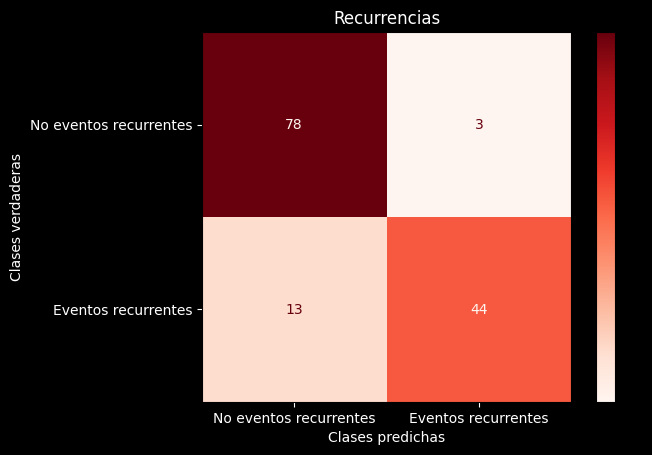

In [ ]:
# Importacion de la matriz de confusion para visualizacion del rendimiento del algoritm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predecir utilizando el modelo ajustado
y_pred = best_bosque.predict(x_test)
class_names = ['No eventos recurrentes', 'Eventos recurrentes']
cm = confusion_matrix(y_test, y_pred, normalize=None)
cmap = 'Reds'

# Mostrar la matriz de confusión
cm_display = ConfusionMatrixDisplay(cm, display_labels=class_names)
cm_display.plot(cmap=cmap)
cm_display.ax_.set(title='Recurrencias', xlabel='Clases predichas', ylabel='Clases verdaderas')

# Cambiar el color de fondo de la figura
plt.gcf().set_facecolor('black')

# Cambiar el color del texto
cm_display.ax_.title.set_color('white')
cm_display.ax_.xaxis.label.set_color('white')
cm_display.ax_.yaxis.label.set_color('white')
cm_display.ax_.tick_params(axis='x', colors='white')
cm_display.ax_.tick_params(axis='y', colors='white')

# Mostrar la matriz de confusión con los nuevos estilos
plt.show()

In [ ]:
  # Imprecion y visualizacion de los puntajes de las metricas para el analisis del rendimiento del algoritmo
  print(classification_report(y_test,y_pred))

  # Metricas para la comparacion del rendimiento del algoritmo
  precision_RanForest = precision_score(y_test, y_pred, average='weighted')
  recall_RanForest = recall_score(y_test, y_pred, average='weighted')
  f1_RanForest = f1_score(y_test, y_pred, average='weighted')

              precision    recall  f1-score   support

           0       0.86      0.96      0.91        81
           1       0.94      0.77      0.85        57

    accuracy                           0.88       138
   macro avg       0.90      0.87      0.88       138
weighted avg       0.89      0.88      0.88       138



# Modelo de SVC

In [ ]:
# Impoetacion del modelo SVM
from sklearn.svm import SVC

In [ ]:
#Aplicacion del modelo SVM utilizando sklearn con la funcion SVC ( Support Vector Classifier)
param_grid = [{'C': [1, 10, 50, 100], #Parametro para controlar el equilibrio del margen
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Tipo de kernel
              #'gamma': [0.1, 1.0],  # Coeficiente de kernel
              'tol': [0.001, 0.01, 0.1],  # Tolerancia al criterio de parada
              'degree': [3, 6, 9],}]  # Grado del polinomio (solo para kernel='poly')

#Inicializo el modelo SVC
modelo_svc = SVC()

#Inicio GridSearchCV con el modelo, los hiperparámetros y la métrica deseada
grid = GridSearchCV(estimator=modelo_svc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

#Entrenamiento del modelo con la búsqueda en la cuadrícula
grid.fit(x_train, y_train)

#Pintamos los resultados:
print("Mejores hiperparámetros: ")
print(grid.best_params_)
print()
print("Puntuaciones: ")
print(grid.cv_results_['mean_test_score'])

Mejores hiperparámetros: 
{'C': 1, 'degree': 3, 'kernel': 'linear', 'tol': 0.01}

Puntuaciones: 
[0.76363636 0.76727273 0.76727273 0.61454545 0.61454545 0.61636364
 0.59636364 0.59636364 0.59636364 0.54       0.54       0.54
 0.76363636 0.76727273 0.76727273 0.62545455 0.62545455 0.62727273
 0.59636364 0.59636364 0.59636364 0.54       0.54       0.54
 0.76363636 0.76727273 0.76727273 0.64363636 0.64545455 0.64909091
 0.59636364 0.59636364 0.59636364 0.54       0.54       0.54
 0.76363636 0.76363636 0.76363636 0.64363636 0.64363636 0.64363636
 0.63454545 0.63454545 0.63636364 0.54909091 0.54909091 0.54909091
 0.76363636 0.76363636 0.76363636 0.64909091 0.64727273 0.65090909
 0.63454545 0.63454545 0.63636364 0.54909091 0.54909091 0.54909091
 0.76363636 0.76363636 0.76363636 0.67272727 0.67272727 0.67272727
 0.63454545 0.63454545 0.63636364 0.54909091 0.54909091 0.54909091
 0.76363636 0.76363636 0.76363636 0.68545455 0.68545455 0.68727273
 0.66727273 0.66545455 0.66727273 0.55090909 0.550

In [ ]:
#Visualizacion de la grilla para el mejor modelo
best_modelo_svc = grid.best_estimator_

#Testeo de precisiom
print("Train Accuracy : %.5f" % best_modelo_svc.score(x_train, y_train))
print("Test Accuracy : %.5f" % best_modelo_svc.score(x_test, y_test))


Train Accuracy : 0.77273
Test Accuracy : 0.71739


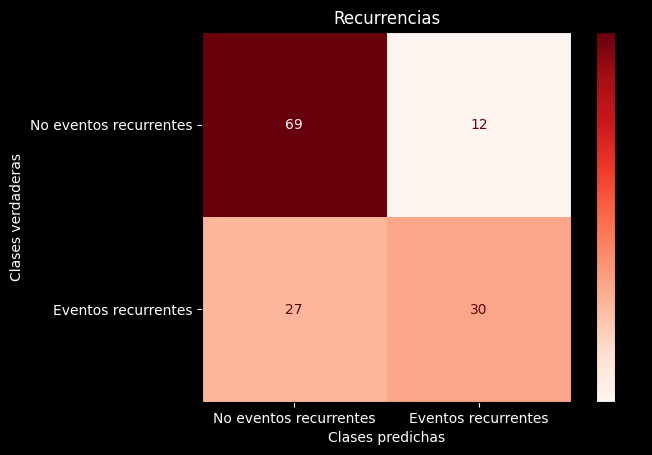

In [ ]:
#Importacion de la matriz de confusion para visualizacion del rendimiento del algoritmo
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predecir utilizando el modelo ajustado
y_pred = best_modelo_svc.predict(x_test)
class_names = ['No eventos recurrentes', 'Eventos recurrentes']
cm = confusion_matrix(y_test, y_pred, normalize=None)
cmap = 'Reds'

# Mostrar la matriz de confusión
cm_display = ConfusionMatrixDisplay(cm, display_labels=class_names)
cm_display.plot(cmap=cmap)
cm_display.ax_.set(title='Recurrencias', xlabel='Clases predichas', ylabel='Clases verdaderas')

# Cambiar el color de fondo de la figura
plt.gcf().set_facecolor('black')

# Cambiar el color del texto
cm_display.ax_.title.set_color('white')
cm_display.ax_.xaxis.label.set_color('white')
cm_display.ax_.yaxis.label.set_color('white')
cm_display.ax_.tick_params(axis='x', colors='white')
cm_display.ax_.tick_params(axis='y', colors='white')

# Mostrar la matriz de confusión con los nuevos estilos
plt.show()

In [ ]:
# Imprecion y visualizacion de los puntajes de las metricas para el analisis del rendimiento del algoritmo
print(classification_report(y_test,y_pred))

# Metricas para la comparacion del rendimiento del algoritmo
precision_svc = precision_score(y_test, y_pred, average='weighted')
recall_svc = recall_score(y_test, y_pred, average='weighted')
f1_svc = f1_score(y_test, y_pred, average='weighted')

              precision    recall  f1-score   support

           0       0.72      0.85      0.78        81
           1       0.71      0.53      0.61        57

    accuracy                           0.72       138
   macro avg       0.72      0.69      0.69       138
weighted avg       0.72      0.72      0.71       138



# Naive Bayes

In [ ]:
# Importacion de la libreria de los algoritmos de Naive bayes
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB

#Entrenamiento con NB gaussiano
Naive_model = GaussianNB()

Naive_model.fit(x_train,y_train)
# Visualizacion de la presicion del algoritmo
print("Train Accuracy : %.5f" % Naive_model.score(x_train, y_train))
print("Test Accuracy : %.5f" % Naive_model.score(x_test, y_test))


Train Accuracy : 0.70364
Test Accuracy : 0.67391


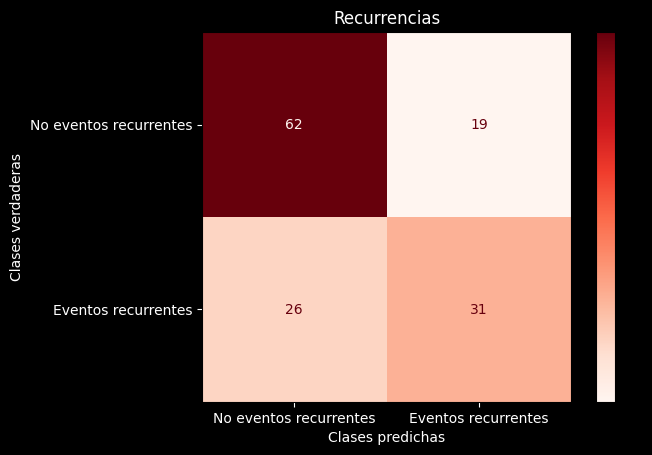

In [ ]:
# Creacion de la matriz de confusion para los resultados del rendimiento del algotirmo
y_pred = Naive_model.predict(x_test)
cm = confusion_matrix(y_test, y_pred, normalize=None)
cmap = 'Reds'

# Configuracion de la matrix
cm_display = ConfusionMatrixDisplay(cm,  display_labels=class_names)
cm_display.plot(cmap=cmap)
cm_display.ax_.set(title='Recurrencias', xlabel='Clases predichas', ylabel='Clases verdaderas')

# Cambiar el color de fondo de la figura
plt.gcf().set_facecolor('black')

# Cambiar el color del texto
cm_display.ax_.title.set_color('white')
cm_display.ax_.xaxis.label.set_color('white')
cm_display.ax_.yaxis.label.set_color('white')
cm_display.ax_.tick_params(axis='x', colors='white')
cm_display.ax_.tick_params(axis='y', colors='white')

# Mostrar la matriz de confusión con los nuevos estilos
plt.show()

In [ ]:
# Imprecion y visualizacion de los puntajes de las metricas para el analisis del rendimiento del algoritmo
print(classification_report(y_test,y_pred))

# Metricas para la comparacion del rendimiento del algoritmo
precision_NB = precision_score(y_test, y_pred, average='weighted')
recall_NB = recall_score(y_test, y_pred, average='weighted')
f1_NB = f1_score(y_test, y_pred, average='weighted')

              precision    recall  f1-score   support

           0       0.70      0.77      0.73        81
           1       0.62      0.54      0.58        57

    accuracy                           0.67       138
   macro avg       0.66      0.65      0.66       138
weighted avg       0.67      0.67      0.67       138



# Modelo XGBOOST

In [ ]:
# Instalacion de la libreria del algoritmo XGBOOST
!pip install xgboost

In [ ]:
#Importacion de la libreria y de el algoritmo a utilizar
import xgboost as xgb
from xgboost import XGBClassifier

# Aplicacion del algoritmo
xgbModel = xgb.XGBClassifier()
xgbModel.fit(x_train,y_train)

#Declaramos las variables que van a hiperparametrizarse
param_grid = [{'criterion': ['gini','entropy'],
              'learning_rate': [0.1, 0.7, 0.9], #Tasa de aprendizaje del algortimo
              'n_estimators': [10,50,200,300],
              'max_depth': [5, 10, 20],
              'subsample': [0.6,0.7,0.8]}] #Controla la fracción de las muestras de entrenamiento que se seleccionan aleatoriamente y se usan para entrenar cada árbol individual en un conjunto de árboles.

#Inicializamos la búsqueda grid
grid = GridSearchCV(xgbModel, param_grid, cv = 5, n_jobs = -1, scoring = 'precision')

#Entrenamos el modelo con la grilla
grid.fit(x_train,y_train)

#Pintamos los resultados:
print("Mejores hiperparámetros: ")
print(grid.best_params_)
print()
print("Puntuaciones: ")
print(grid.cv_results_['mean_test_score'])


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[01:19:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion" } are not used.




Mejores hiperparámetros: 
{'criterion': 'gini', 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.7}

Puntuaciones: 
[0.84686376 0.8329587  0.82721205 0.8294761  0.82914878 0.82382898
 0.85359375 0.87112449 0.86081085 0.84817927 0.85723778 0.84671012
 0.84449675 0.8322796  0.8581754  0.81357655 0.80498821 0.82462398
 0.84784695 0.85717579 0.8527322  0.8402916  0.8626071  0.84433837
 0.83847525 0.82422099 0.85832571 0.81426499 0.8268096  0.81996634
 0.84554704 0.85079365 0.83941072 0.84553983 0.85572968 0.83866405
 0.79999236 0.77970494 0.78594671 0.83380277 0.78725454 0.83301981
 0.85320144 0.8210787  0.8275866  0.82590322 0.8075006  0.82161262
 0.78064579 0.80925876 0.83241711 0.81446612 0.81270401 0.84615889
 0.83071635 0.83651783 0.83030267 0.83176987 0.82074402 0.82095895
 0.77383921 0.81208613 0.82905263 0.80836856 0.81229427 0.8378365
 0.82202069 0.81940827 0.83995224 0.83176987 0.81632497 0.82013539
 0.76806892 0.80021544 0.79384218 0.81156754 0.8080438  

In [ ]:
# Definicion de los hiperpartametros del algoritmo para su entrenamiento
xgbModel = xgb.XGBClassifier(learning_rate = 0.9, max_depth = 5, n_estimators=200, subsample=0.8)
xgbModel.fit(x_train,y_train)

# Visualizacion de la precision
print("Train Accuracy : %.5f" % xgbModel.score(x_train, y_train))
print("Test Accuracy : %.5f" % xgbModel.score(x_test, y_test))

Train Accuracy : 0.96909
Test Accuracy : 0.90580


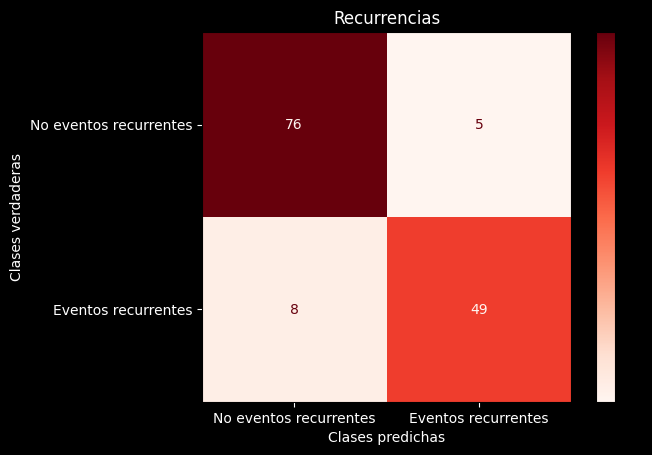

In [ ]:
# Creacion de la matriz de confusion para los resultados del rendimiento del algotirmo
y_pred = xgbModel.predict(x_test)
cm = confusion_matrix(y_test, y_pred, normalize=None)
cmap = 'Reds'

# Configuracion de la matrix
cm_display = ConfusionMatrixDisplay(cm,  display_labels=class_names)
cm_display.plot(cmap=cmap)
cm_display.ax_.set(title='Recurrencias', xlabel='Clases predichas', ylabel='Clases verdaderas')

# Cambiar el color de fondo de la figura
plt.gcf().set_facecolor('black')

# Cambiar el color del texto
cm_display.ax_.title.set_color('white')
cm_display.ax_.xaxis.label.set_color('white')
cm_display.ax_.yaxis.label.set_color('white')
cm_display.ax_.tick_params(axis='x', colors='white')
cm_display.ax_.tick_params(axis='y', colors='white')

# Mostrar la matriz de confusión con los nuevos estilos
plt.show()

In [ ]:
# Imprecion y visualizacion de los puntajes de las metricas para el analisis del rendimiento del algoritmo
print(classification_report(y_test,y_pred))

# Metricas para la comparacion del rendimiento del algoritmo
precision_XGB = precision_score(y_test, y_pred, average='weighted')
recall_XGB = recall_score(y_test, y_pred, average='weighted')
f1_XGB = f1_score(y_test, y_pred, average='weighted')

              precision    recall  f1-score   support

           0       0.90      0.94      0.92        81
           1       0.91      0.86      0.88        57

    accuracy                           0.91       138
   macro avg       0.91      0.90      0.90       138
weighted avg       0.91      0.91      0.91       138



# Modelo ADABoost

## Para SVC

In [ ]:
# Aplicacion de ADABoost para modelos de uso potencial
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Definir el modelo SVC
svc = SVC(C= 100, degree= 3, kernel= 'linear', tol= 0.001)

# Definir el modelo AdaBoost con el SVC como estimador base
ada_boost = AdaBoostClassifier(base_estimator=svc, algorithm='SAMME', learning_rate=0.9)

ada_boost.fit(x_train, y_train)

print("Train Accuracy : %.5f" % ada_boost.score(x_train, y_train))
print("Test Accuracy : %.5f" % ada_boost.score(x_test, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



Train Accuracy : 0.76364
Test Accuracy : 0.73913


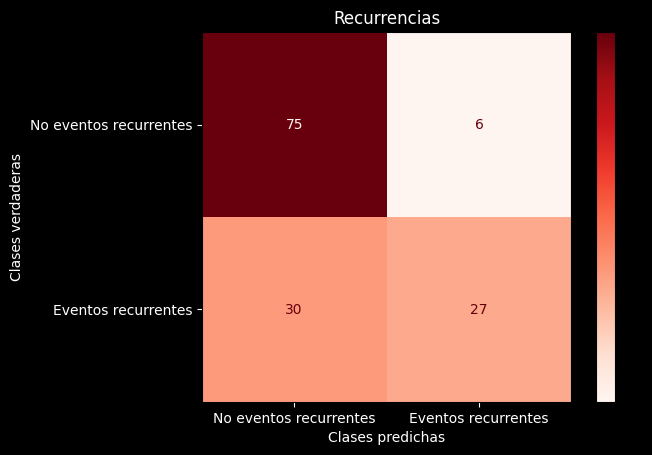

In [ ]:
# Creacion de la matriz de confusion para los resultados del rendimiento del algotirmo
y_pred = ada_boost.predict(x_test)
cm = confusion_matrix(y_test, y_pred, normalize=None)
cmap = 'Reds'
# Configuracion de la matrix
cm_display = ConfusionMatrixDisplay(cm,  display_labels=class_names)
cm_display.plot(cmap=cmap)
cm_display.ax_.set(title='Recurrencias', xlabel='Clases predichas', ylabel='Clases verdaderas')

# Cambiar el color de fondo de la figura
plt.gcf().set_facecolor('black')

# Cambiar el color del texto
cm_display.ax_.title.set_color('white')
cm_display.ax_.xaxis.label.set_color('white')
cm_display.ax_.yaxis.label.set_color('white')
cm_display.ax_.tick_params(axis='x', colors='white')
cm_display.ax_.tick_params(axis='y', colors='white')

# Mostrar la matriz de confusión con los nuevos estilos
plt.show()

In [ ]:
# Imprecion y visualizacion de los puntajes de las metricas para el analisis del rendimiento del algoritmo
print(classification_report(y_test,y_pred))

# Metricas para la comparacion del rendimiento del algoritmo
precision_AB_svc = precision_score(y_test, y_pred, average='weighted')
recall_AB_svc = recall_score(y_test, y_pred, average='weighted')
f1_AB_svc = f1_score(y_test, y_pred, average='weighted')

              precision    recall  f1-score   support

           0       0.71      0.93      0.81        81
           1       0.82      0.47      0.60        57

    accuracy                           0.74       138
   macro avg       0.77      0.70      0.70       138
weighted avg       0.76      0.74      0.72       138



## Para Naives Bayes

In [ ]:
# Aplicaion para el modelo de Naive Bayes+ADABoost
Naive_model = GaussianNB()

# Definir el modelo AdaBoost con el SVC como estimador base
ada_boost = AdaBoostClassifier(base_estimator=Naive_model, algorithm='SAMME', learning_rate=0.3)

ada_boost.fit(x_train, y_train)

print("Train Accuracy : %.5f" % ada_boost.score(x_train, y_train))
print("Test Accuracy : %.5f" % ada_boost.score(x_test, y_test))

Train Accuracy : 0.74364
Test Accuracy : 0.73913


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



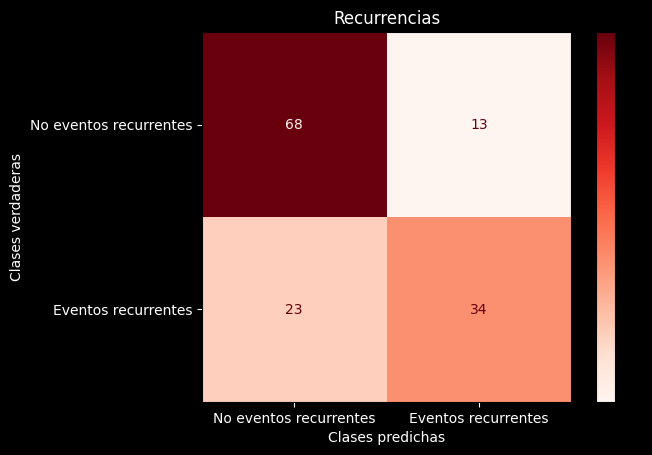

In [ ]:
# Visializacion de lo0s resultados en la matriz de confusion
y_pred = ada_boost.predict(x_test)
cm = confusion_matrix(y_test, y_pred, normalize=None)
cmap = 'Reds'

cm_display = ConfusionMatrixDisplay(cm,  display_labels=class_names)
cm_display.plot(cmap=cmap)
cm_display.ax_.set(title='Recurrencias', xlabel='Clases predichas', ylabel='Clases verdaderas')

# Cambiar el color de fondo de la figura
plt.gcf().set_facecolor('black')

# Cambiar el color del texto
cm_display.ax_.title.set_color('white')
cm_display.ax_.xaxis.label.set_color('white')
cm_display.ax_.yaxis.label.set_color('white')
cm_display.ax_.tick_params(axis='x', colors='white')
cm_display.ax_.tick_params(axis='y', colors='white')

# Mostrar la matriz de confusión con los nuevos estilos
plt.show()

# Metricas de Clasificación para los modelos

En el contexto de la evaluación del rendimiento de un modelo de clasificación, las métricas de precisión (precision), exhaustividad (recall) y puntuación F1 (f1-score) son indicadores clave que proporcionan información sobre la calidad de las predicciones del modelo. Estas métricas se calculan utilizando la matriz de confusión, que resume el rendimiento del modelo al comparar las predicciones del modelo con las clases reales de los datos.

- precisión:

  se refiere a la proporción de instancias positivas que fueron correctamente identificadas por el modelo entre todas las instancias que el modelo clasificó como positivas. Es una medida de la exactitud de las predicciones positivas del modelo.

- Recall:

  La exhaustividad, también conocida como sensibilidad o tasa de verdaderos positivos, se refiere a la proporción de instancias positivas que fueron correctamente identificadas por el modelo entre todas las instancias que realmente son positivas. Es una medida de la capacidad del modelo para identificar todas las instancias positivas.

- F1-score:

  Es la media armónica de precisión y exhaustividad. Proporciona un equilibrio entre ambas métricas y es útil cuando hay un desequilibrio entre las clases o cuando es importante tanto la precisión como la exhaustividad

In [ ]:
# Visualizacion del rendimiento del algoritmo+ ADABoost
print(classification_report(y_test,y_pred))
precision_AB_NB = precision_score(y_test, y_pred, average='weighted')
recall_AB_NB = recall_score(y_test, y_pred, average='weighted')
f1_AB_NB = f1_score(y_test, y_pred, average='weighted')

              precision    recall  f1-score   support

           0       0.75      0.84      0.79        81
           1       0.72      0.60      0.65        57

    accuracy                           0.74       138
   macro avg       0.74      0.72      0.72       138
weighted avg       0.74      0.74      0.73       138



In [ ]:
# Aplicacion de metricas para la comparacion del rendimiento de los algoritmos combinados
metricas = pd.DataFrame({"precision": [precision_AB_NB, precision_AB_svc, precision_NB, precision_RanForest, precision_XGB, precision_svc],
                        "recall": [recall_AB_NB, recall_AB_svc, recall_NB, recall_RanForest, recall_XGB, recall_svc],
                        "f1-score": [f1_AB_NB, f1_AB_svc, f1_NB, f1_RanForest, f1_XGB, f1_svc]
                         })
indices = ["AdaBoost_NB", "AdaBoost_svm", "Naives_Bayes", "Random_Forest", "XGBoost", "SVM"]
metricas.index = indices

metricas

,precision,recall,f1-score
AdaBoost_NB,0.737402,0.739130,0.734172
AdaBoost_svm,0.757199,0.739130,0.721178
Naives_Bayes,0.669625,0.673913,0.670000
Random_Forest,0.889785,0.884058,0.881854
XGBoost,0.905855,0.905797,0.905380
SVM,0.716906,0.717391,0.707956


In [ ]:
# Visualizacion y comparacion de las metricas por medio de un grafico
metricas_reset = metricas.reset_index()

# Graficar utilizando Plotly Express
fig = px.bar(metricas_reset, x='index', y=['precision', 'recall', 'f1-score'],
             title='Métricas de clasificación por modelo', barmode='group', color_discrete_sequence = px.colors.sequential.RdBu)

# Configurar estilo del gráfico
fig.update_layout(
    xaxis_title='Modelos de entrenamiento',
    yaxis_title='Valores de metricas',
    plot_bgcolor='black',  # Color de fondo del gráfico
    paper_bgcolor='black',  # Color de fondo del papel (fuera del gráfico)
    title_font_color='white',  # Color del texto del título
    font_color='white',  # Color del texto del eje x e y
    yaxis=dict(range=[0.6, 1]),  # Establecer el rango del eje y
    title_x=0.5  # Centrar el título
)

# Mostrar el gráfico
fig.show()